# Verifica su Python e Numpy
### COGNOME NOME

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## ESERCIZIO 1
Il file *10000Pi.txt* contiene le prime 10000 cifre del $\pi$ in base 10.

Crea un programma in Python 3 (decidi se usare Numpy oppure no) che legga il file e generi un dizionario in cui:
* le chiavi siano le cifre da 0 a 9,
* i valori siano il numero di occorrenze della cifra chiave nelle prime 10000 cifre decimali del $\pi$.

Rispondi alle domande seguenti:
* nelle cifre del $\pi$ capita più spesso uno 0 dopo il 9 oppure un 9 dopo lo 0?
* è presente la seguenza 999999? In caso di risposta affermativa individua in quale punto della sequenza di cifre decimali è presente.

In [2]:
zero_nove=["0","1","2","3","4","5","6","7","8","9"]
file=open("10000Pi.txt","r",encoding="utf-8")
dati=file.read()
file.close()
print(dati)
dati = dati.replace("\n", "")
dati=np.array(list(dati))
print(dati)
dati=dati[2:1002]
dizionario={}
for numeri in zero_nove:
    dizionario[numeri]=np.count_nonzero(dati[numeri==dati])
dizionario

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

{'0': 93,
 '1': 116,
 '2': 103,
 '3': 102,
 '4': 93,
 '5': 97,
 '6': 94,
 '7': 95,
 '8': 101,
 '9': 106}

In [3]:
zero_dopo_nove=np.count_nonzero((dati=="0") & (np.roll(dati,+1)=="9"))
nove_dopo_zero=np.count_nonzero((dati=="9") & (np.roll(dati,+1)=="0"))
if nove_dopo_zero>zero_dopo_nove:
    print("capita più spesso il 9 dopo lo 0")
else:
    print("capita più spesso lo 0 dopo il 9")

capita più spesso il 9 dopo lo 0


In [4]:
sequenza=np.count_nonzero((dati=="9")&(np.roll(dati,-1)=="9")&(np.roll(dati,-2)=="9")&(np.roll(dati,-3)=="9")&(np.roll(dati,-4)=="9")&(np.roll(dati,-5)=="9"))
print(f"il valore 999999 e presente {sequenza} volte")

il valore 999999 e presente 1 volte


In [5]:
sequenza=1
if sequenza!=0:
    for i in range (len(dati)-5):
        if np.count_nonzero((dati[i]=="9")&(dati[i+1]=="9")&(dati[i+2]=="9")&(dati[i+3]=="9")&(dati[i+4]=="9")&(dati[i+5]=="9"))!=0:
            print(f"la serie di 9 inizia all'indice {i}")
            


la serie di 9 inizia all'indice 761


## ESERCIZIO 2
Dato un numero intero n crea un array numpy unidimensionale fatto in questo modo:

    [-n, -n+1, -n+2, ...,-1, 0, 1, ..., n-2, n-1, n]
    
Per esempio se n=3 l'array è:

    [-3, -2, -1, 0, 1, 2, 3]
    
**NON PUOI USARE CICLI, IF E LISTE**

In [6]:
#soluzione qui
n=3
array=np.arange(-n,n+1)
array

array([-3, -2, -1,  0,  1,  2,  3])

### ESERCIZIO 3
Simula 100 partite di pari e dispari tra Alice e Bob. Ogni partita è giocata con una mano, quindi i numeri mostrati da Alice e da Bob sono sempre compresi tra 1 e 5. **Simula le partite usando un solo array bidimensionale.**

Alice dichiara sempre pari e Bob sempre dispari.

1) Quante volte vince Alice?

2) Se nelle 100 partite Alice fa uscire sempre 3, quante volte vince?

**NON PUOI USARE CICLI, IF E LISTE**

In [7]:
alice_vs_bob=np.random.randint(1,6,(100,2))
alice_win=100-np.count_nonzero((alice_vs_bob[:,0]+alice_vs_bob[:,1])%2)
print(f"alice vince {alice_win} volte")

alice vince 51 volte


In [8]:
alice_vs_bob=np.random.randint(1,6,(100,2))
alice_vs_bob[:,0]=3
alice_win=100-np.count_nonzero((alice_vs_bob[:,0]+alice_vs_bob[:,1])%2)
print(f"mettendo sempre 3 alice vince {alice_win} volte")

mettendo sempre 3 alice vince 56 volte


## ESERCIZIO 4 (BONUS, Facoltativo per DSA)
Usa numpy per creare l'immagine seguente composta da n righe e 2n colonne. L'intensità del colore è casuale nella metà sinistra della. matrice, a scacchiera nella metà destra. 

**NON PUOI USARE CICLI, IF E LISTE**

Per esempio con n = 10:

![matrice](matrice.png)

Codice per visualizzare l'immagine:

    plt.imshow(mat)

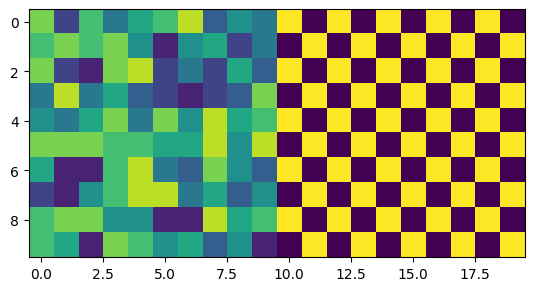

In [9]:
n=10
array2d=np.random.randint(1,n,(n,2*n))
array2d[::2,n::2]=n
array2d[1::2,n+1::2]=n
array2d[1::2,n::2]=0
array2d[::2,n+1::2]=0
plt.imshow(array2d)